# Deep Learning

## HW1- Problem 3 - Regression (100 pts)

### Please fill this part


1.   Full Name: Amir Mohammad Yaghoobian zadeh
2.   Student Number: 401300525


*You are just allowded to change those parts that start with "TO DO". Please do not change other parts.*

*It is highly recommended to read each codeline carefully and try to understand what it exactly does. Best of luck and have fun!*

In [1]:
# You are not allowed to import other packages.

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error

### Part1:
Consider the dataset which has been given to you. Split the dataset into the `training dataset` and `test dataset`. You can use `80%` of the data for training and the rest for testing.

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

dataset = pd.read_csv("gdrive/MyDrive/Deep learning/HW1/data/data01.csv")

# implement the split part
# name them: x_train, x_test, y_train, y_test

x_train = dataset['X'].iloc[:int(len(dataset) * 0.8)].to_numpy()
y_train = dataset['Y'].iloc[:int(len(dataset) * 0.8)].to_numpy()

x_test = dataset['X'].iloc[int(len(dataset) * 0.8):].to_numpy()
y_test = dataset['Y'].iloc[int(len(dataset) * 0.8):].to_numpy()

Mounted at /content/gdrive


### Part2:
Assume there is simple linear relationship between X and Y. Train a simple `Linear Regression` on the training dataset and report its accuracy on the training and testing dataset, separately.

In [3]:
# here you can implement via sgd or use least square solution. we suggest the second one inv(A^T A) * A^T y.
# consider m as the returned line --> m[0] = the slope , m[1] = y intercept, also don't forget to use numpy for calculating m.

A = np.concatenate([x_train.reshape(-1,1), np.ones((x_train.shape[0],1))],axis=1)
m = np.linalg.inv(A.T @ A) @ A.T @ y_train
print(m)

[-1.02641738  0.81500634]


In [4]:
predicted_train_y = m[0] * x_train + m[1]
predicted_test_y = m[0] * x_test + m[1]

train_error = np.mean((predicted_train_y - y_train)**2)
test_error = np.mean((predicted_test_y - y_test)**2)

print(f"MSE train error: {train_error}\nMSE test error: {test_error}")

MSE train error: 0.32467763017774226
MSE test error: 0.3544951192130029


### Part3:
Draw the line you've found in the last part, on train and test points (each separately).

Text(0.5, 1.0, 'Train dataset')

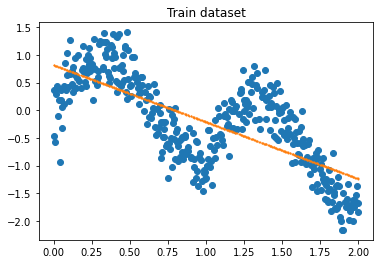

In [5]:
plt.scatter(x_train, y_train)
plt.scatter(x_train, m[0]*x_train + m[1], s=1)
plt.title("Train dataset")

Text(0.5, 1.0, 'Test dataset')

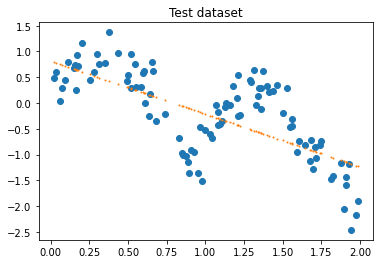

In [6]:
plt.scatter(x_test, y_test)
plt.scatter(x_test, m[0]*x_test + m[1], s=1)
plt.title("Test dataset")

### Part4:
Were the reported accuracies acceptable?

What about the line you drew in the last part?

Was it appropriate for the dataset?
<br><br/>
Explain what are the main problems here.

میزان خطای محاسبه شده با نمودار ها سازگار است.
بهترین مدل خطی برای این دادگان محاسبه شده و از نمودار ها نیز مشهود است.
مدل خطی برای این دادگان مناسب نیست و بهتر است از مدل های دیگری نظیر مدل چند جمله ای استفاده شود.
مشکل اصلی در فرض اولیه کلاس مدل ها است که محدود در نظر گرفته شده و ما با یک مدل underfit مواجه هستیم.


### Part5:
Now, consider the `Locally Weighted Linear Regression` approach for this problem. Do expect it performs better than simple `Linear Regression` for this dataset?

با توجه به جستجوی اینترنتی این روش می تواند برای دادگان با رابطه غیر خطی نتیجه بهتری داشته باشد.
https://aman.ai/cs229/locally-weighted-linear-regression/


### Part6:
Here, we want to implement the `suggested model`. You can implement any weight function you want, the below implementation is just a sample:
<br><br/>
\begin{equation*}
    w^{(i)}=exp\left(-\frac{(\mathbf x^{(i)}-\mathbf x)^\top(\mathbf x^{(i)}-\mathbf x)}{2\tau^2}\right)
\end{equation*}

In [7]:
def get_weight_matrix(the_query_point, train_dataset, hyperparameter):
    l = train_dataset.shape[0]
    W = np.mat(np.eye(l))
    for i, xi in enumerate(train_dataset):
        W[i, i] = np.exp(-(xi-the_query_point).T @ (xi-the_query_point)/(2*hyperparameter**2))
    return W

Now implement the `closed form solution` based on the following formula:
<br><br/>
\begin{equation*}
    \boldsymbol\theta=(X^\top WX)^{-1}(X^\top WY)
\end{equation*}
<br><br/>
Of course if you use another form, implement your own.

In [8]:
def predict(train_X, train_Y, query_x, hyperparameter):
    l = train_X.shape[0]
    X = np.hstack((train_X.reshape(-1,1), np.ones((l, 1))))
    qx = np.asarray([query_x, 1])
    W = get_weight_matrix(qx, X, hyperparameter)
    # print(X.shape,W.shape,train_Y.shape)
    theta = np.linalg.inv(X.T @ W @ X) @ (X.T @ W @ train_Y.reshape(-1,1))

    return np.dot(qx, theta)

### Part7:
Report accuracy of this model on the test dataset. Also, draw a plot that contains (x_test, y_test) pairs and (x_test, predicted_y) pairs that differ in color.

In [9]:
hyperparameter = 0.02
predicted_test = [predict(x_train, y_train, query, hyperparameter) for query in x_test]

error = np.mean((np.asarray(predicted_test).reshape(-1,) - y_test)**2)
print(f"MSE test error: {error}")

MSE test error: 0.0966317411543251


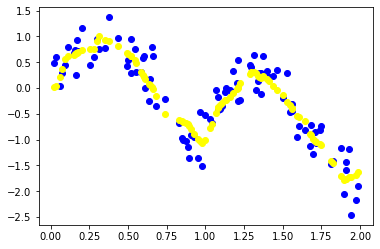

In [10]:
plt.scatter(x_test, y_test, c="blue")
plt.scatter(x_test, predicted_test, c="yellow")

### Part8:
Is the performance of the new model better than the previous one? `Explain`.

با توجه به نمودار رسم شده دقت این مدل نسبت به مدل خطی بهتر است و خطای کمتری دارد. مقدار خطا از 0.35 به 0.09 کاهش یافته است.

### Part9:
Now, we want to consider the `KNN` approach for this problem; Do you think it will perform well?

این روش نیز به دلیل آنکه همسایگی (نقاط مجاور و نزدیک به داده هدف) را در نظر میگیرد در مورد توابع هموار می تواند دقت خوبی داشته باشد.

### Part10:
Implementing the `KNN model`.

In [11]:
class KNN:
    def __init__(self, number_neighbours, X, Y):
        self.k = number_neighbours
        self.X = X
        self.Y = Y

    def distance(self, x1, x2):
        distance = np.linalg.norm(x1-x2, ord=2) # implement the distance function
        return distance

    def return_nn_ids(self, x):
        indices = np.asarray([self.distance(x1, x) for x1 in self.X]).argsort()[0:self.k]  # find indices of k nearest neighbours to x
        return indices

    def predict(self, x):
        neareest_indices = self.return_nn_ids(x)
        predicted_y = self.Y[neareest_indices].mean()
        return predicted_y

In [12]:
def evaluation(k, x_train, y_train, x_test, y_test):
    model = KNN(k, x_train, y_train)
    predicted_y = [model.predict(x) for x in x_test]
    error = np.mean((np.asarray(predicted_y).reshape(-1,) - y_test)**2)
    return error, predicted_y

In [18]:
k = 16
error_knn, predicted_y = evaluation(k, x_train.reshape(-1,1), y_train, x_test, y_test)
print(f"MSE error of KNN for test dataset: {error_knn}")

MSE error of KNN for test dataset: 0.09837610676149099


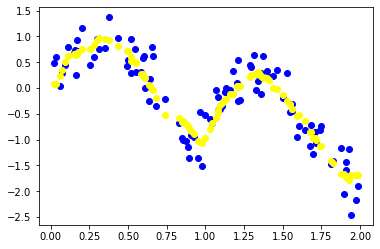

In [16]:
plt.scatter(x_test, y_test, c="blue")
plt.scatter(x_test, predicted_y, c="yellow")

To find best K for this algorithm we suggest to use cross-validation.
<br><br/>
Did this model perform well (due to the plot and test accuracy)?

براساس نمودار دقت این مدل نیز مناسب است. خطای مدل نیز مانند بخش قبل 0.09 است.

In [17]:
# 5-fold validation
X = np.concatenate([dataset['X'],dataset['X']])
Y = np.concatenate([dataset['Y'],dataset['Y']])

for k in range(2,30):
  error = []
  for f in range(5):
    x_train = X[int(len(dataset) * 0.2*(f+1)):int(len(dataset) * 0.2*(f+5))]
    y_train = Y[int(len(dataset) * 0.2*(f+1)):int(len(dataset) * 0.2*(f+5))]

    x_test = X[int(len(dataset) * 0.2*f):int(len(dataset) * 0.2*(f+1))]
    y_test = Y[int(len(dataset) * 0.2*f):int(len(dataset) * 0.2*(f+1))]
    
    error_knn, predicted_y = evaluation(k, x_train.reshape(-1,1), y_train, x_test, y_test)
    error.append(error_knn)
  
  error = np.asarray(error)
  print(k, f"mean error: {error.mean()}, std error: {error.std()}")

# best K: 16

2 mean error: 0.12969998952457584, std error: 0.01501433507991719
3 mean error: 0.11047010729924571, std error: 0.009156400938442506
4 mean error: 0.10243193868099802, std error: 0.011146997128144119
5 mean error: 0.10098101735776858, std error: 0.012392019270100366
6 mean error: 0.09892315984255073, std error: 0.013277990207329107
7 mean error: 0.09780008770784081, std error: 0.012435851732884208
8 mean error: 0.09616870835395178, std error: 0.01178536726063611
9 mean error: 0.09474794338471632, std error: 0.011907108179182165
10 mean error: 0.09470909831643651, std error: 0.012983313389650754
11 mean error: 0.09521507730525942, std error: 0.012001513440797683
12 mean error: 0.0944986704260809, std error: 0.012464240720827767
13 mean error: 0.0942713557276304, std error: 0.01284871423401809
14 mean error: 0.09427319148177214, std error: 0.0129710704679693
15 mean error: 0.09339607187189805, std error: 0.012821839063009663
16 mean error: 0.09287265425811624, std error: 0.01238534402909